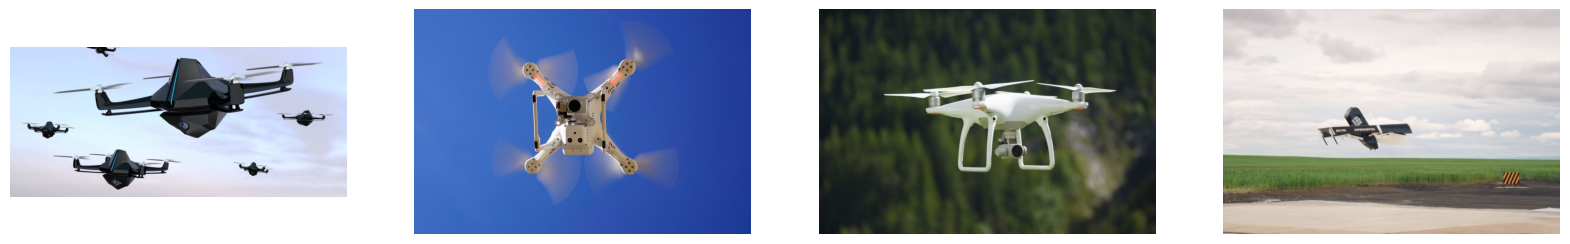

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img_paths = ['/content/0001.jpg', '/content/0003.jpg', '/content/0004.jpg', '/content/0005.jpg']
images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in img_paths]

fig, axs = plt.subplots(1, 4, figsize=(20, 10))
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

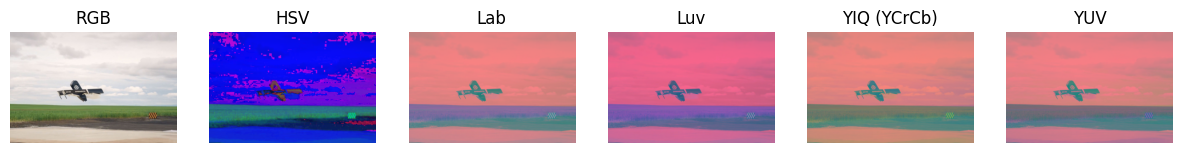

In [ ]:
image_path = '/content/0005.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2Lab)
image_luv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2Luv)
image_yiq = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YCrCb)  # Approximation using YCrCb
image_yuv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YUV)

def plot_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

plot_images(
    [image_rgb, image_hsv, image_lab, image_luv, image_yiq, image_yuv],
    ['RGB', 'HSV', 'Lab', 'Luv', 'YIQ (YCrCb)', 'YUV']
)


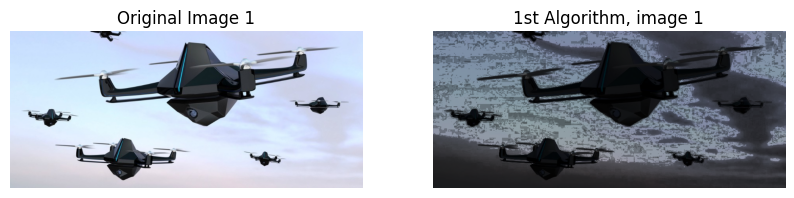

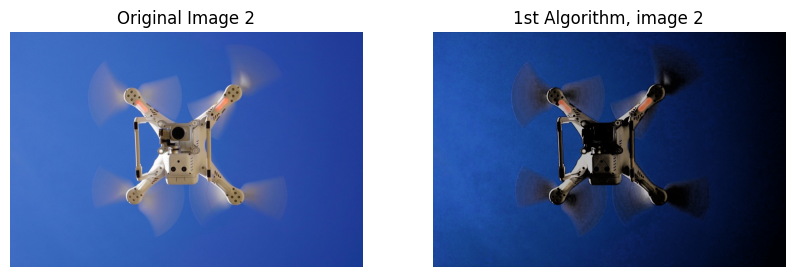

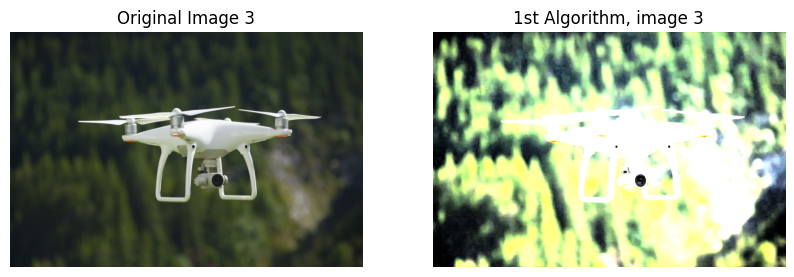

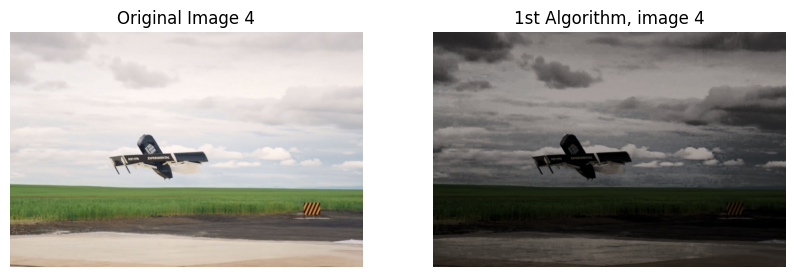

In [ ]:


def convert_and_enhance_rgb_to_hsv(image_path):
    image = cv2.imread(image_path)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    v_enhanced = cv2.equalizeHist(v)
    s_enhanced = cv2.medianBlur(s, 5)
    s_enhanced = np.clip(s_enhanced * 1.2, 0, 255).astype(np.uint8)
    hsv_enhanced = cv2.merge([h, s_enhanced, v_enhanced])

    rgb_enhanced = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2BGR)

    v_old_mean = np.mean(v)
    v_new_mean = np.mean(v_enhanced)
    if v_old_mean == 0:
        v_old_mean = 1
    if v_new_mean == 0:
        v_new_mean = 1
    rgb_corrected = rgb_enhanced * (v_new_mean / v_old_mean)
    rgb_corrected = np.clip(rgb_corrected, 0, 255).astype(np.uint8)

    return rgb_corrected

image_paths = ['/content/0001.jpg', '/content/0003.jpg', '/content/0004.jpg', '/content/0005.jpg']

for i, path in enumerate(image_paths):
    enhanced_image = convert_and_enhance_rgb_to_hsv(path)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    original_image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    axs[0].imshow(original_image)
    axs[0].set_title(f'Original Image {i+1}')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title(f'1st Algorithm, image {i+1}')
    axs[1].axis('off')

    plt.show()


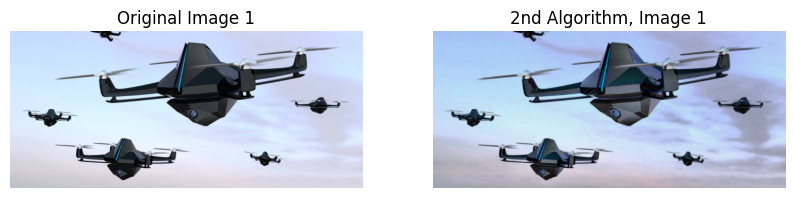

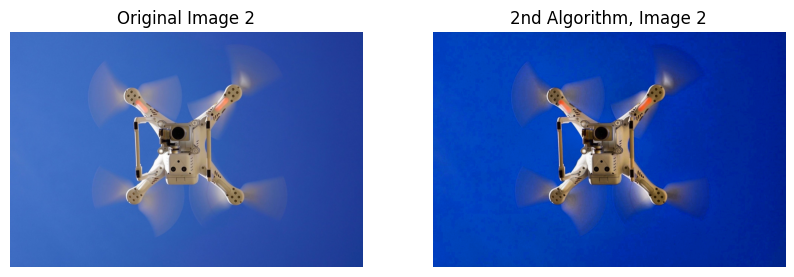

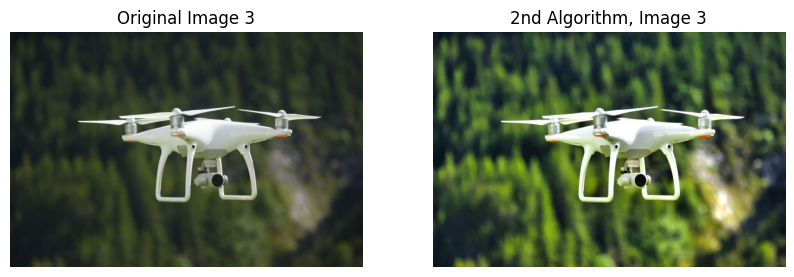

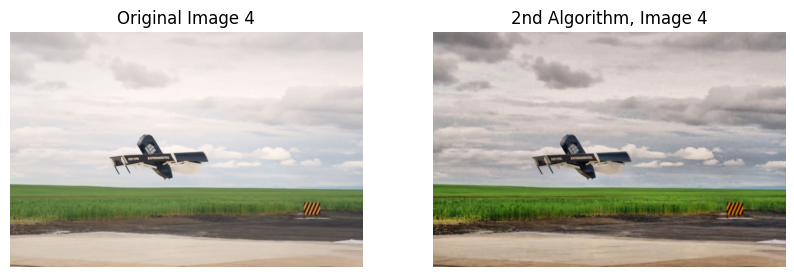

In [ ]:

def modified_convert_and_enhance_rgb_to_hsv(image_path):
    image = cv2.imread(image_path)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    v_enhanced = clahe.apply(v)
    s_enhanced = cv2.medianBlur(s, 7)
    s_enhanced = np.clip(s_enhanced * 1.5, 0, 255).astype(np.uint8)

    hsv_enhanced = cv2.merge([h, s_enhanced, v_enhanced])

    rgb_enhanced = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2BGR)

    v_old_mean = np.mean(v)
    v_new_mean = np.mean(v_enhanced)
    if v_old_mean == 0:
        v_old_mean = 1
    if v_new_mean == 0:
        v_new_mean = 1
    rgb_corrected = rgb_enhanced * (v_new_mean / v_old_mean)
    rgb_corrected = np.clip(rgb_corrected, 0, 255).astype(np.uint8)

    return rgb_corrected

image_paths = ['/content/0001.jpg', '/content/0003.jpg', '/content/0004.jpg', '/content/0005.jpg']

enhanced_images = []
for i, path in enumerate(image_paths):
    enhanced_image = modified_convert_and_enhance_rgb_to_hsv(path)
    enhanced_images.append(enhanced_image)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    original_image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    axs[0].imshow(original_image)
    axs[0].set_title(f'Original Image {i+1}')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title(f'2nd Algorithm, Image {i+1}')
    axs[1].axis('off')

    plt.show()


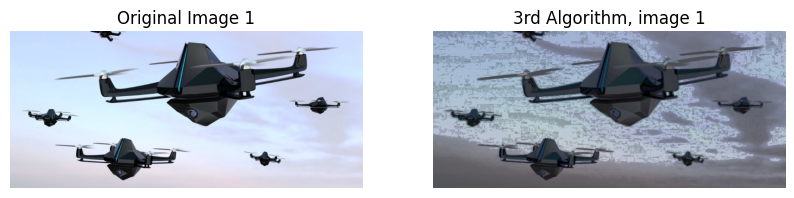

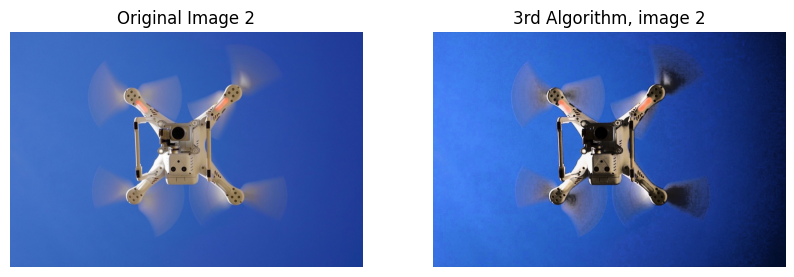

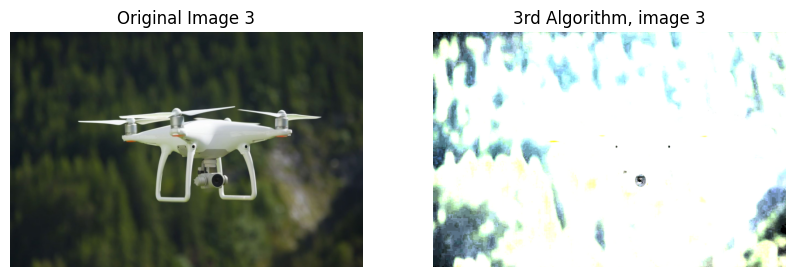

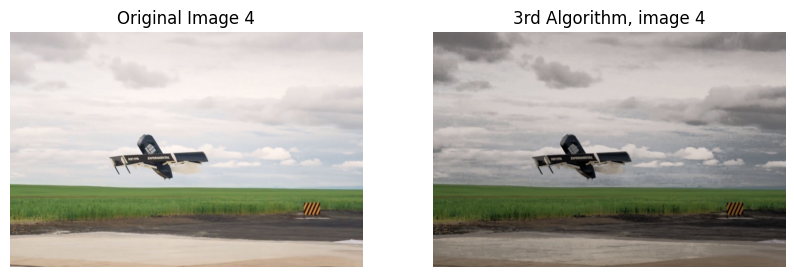

In [ ]:

def further_modified_convert_and_enhance_rgb_to_hsv(image_path):
    image = cv2.imread(image_path)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v_enhanced = cv2.equalizeHist(v)
    s_blurred = cv2.GaussianBlur(s, (9, 9), 0)
    s_enhanced = np.clip(s_blurred * 1.1, 0, 255).astype(np.uint8)

    gamma = 0.5  # Lower gamma < 1 darkens, gamma > 1 brightens
    v_corrected = np.power(v_enhanced / 255.0, gamma) * 255.0
    v_corrected = np.clip(v_corrected, 0, 255).astype(np.uint8)

    hsv_enhanced = cv2.merge([h, s_enhanced, v_corrected])

    rgb_enhanced = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2BGR)

    v_old_mean = np.mean(v)
    v_new_mean = np.mean(v_corrected)
    if v_old_mean == 0:
        v_old_mean = 1
    if v_new_mean == 0:
        v_new_mean = 1
    rgb_corrected = rgb_enhanced * (v_new_mean / v_old_mean)
    rgb_corrected = np.clip(rgb_corrected, 0, 255).astype(np.uint8)

    return rgb_corrected

image_paths = ['/content/0001.jpg', '/content/0003.jpg', '/content/0004.jpg', '/content/0005.jpg']

for i, path in enumerate(image_paths):
    enhanced_image = further_modified_convert_and_enhance_rgb_to_hsv(path)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    original_image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    axs[0].imshow(original_image)
    axs[0].set_title(f'Original Image {i+1}')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title(f'3rd Algorithm, image {i+1}')
    axs[1].axis('off')

    plt.show()


Estimated noise level: 2.3969583333333335
Estimated noise level: 0.7130850824587707
Estimated noise level: 1.043471139430285
Estimated noise level: 0.7303720930232558


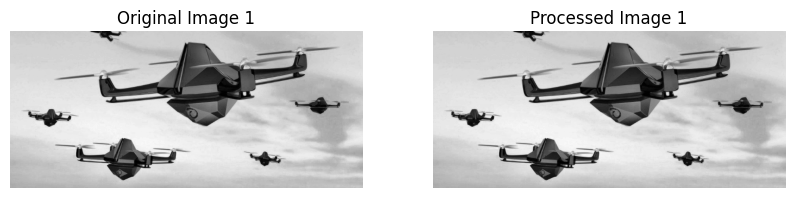

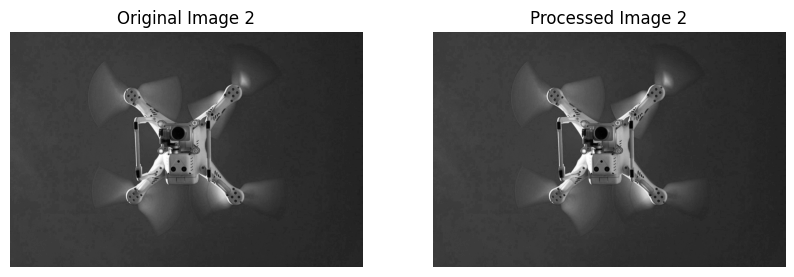

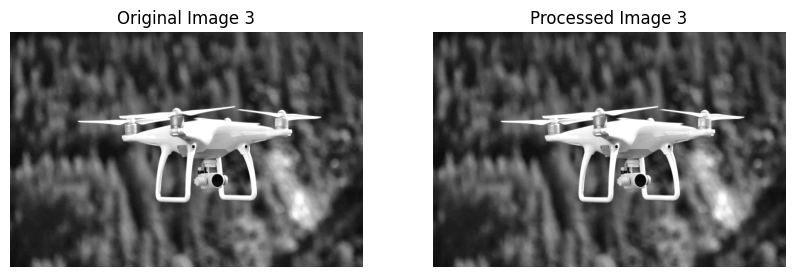

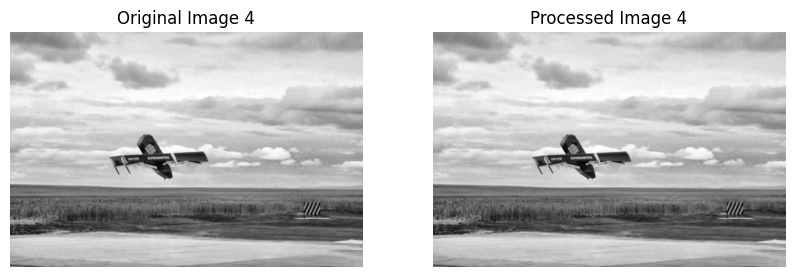

In [ ]:


def estimate_noise_level(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    diff = cv2.absdiff(image, blurred)

    noise_level = np.mean(diff)
    return noise_level

def apply_noise_reduction_if_needed(image, noise_threshold):
    noise_level = estimate_noise_level(image)
    print(f"Estimated noise level: {noise_level}")

    if noise_level > noise_threshold:
        denoised_image = cv2.fastNlMeansDenoising(image, None, 10, 7, 21)
        return denoised_image
    else:
        return image

images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img for img in enhanced_images]

noise_threshold = 10

processed_images = [apply_noise_reduction_if_needed(img, noise_threshold) for img in images]

for i, (orig_img, proc_img) in enumerate(zip(images, processed_images)):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(orig_img, cmap='gray')
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(proc_img, cmap='gray')
    plt.title(f'Processed Image {i+1}')
    plt.axis('off')
    plt.show()


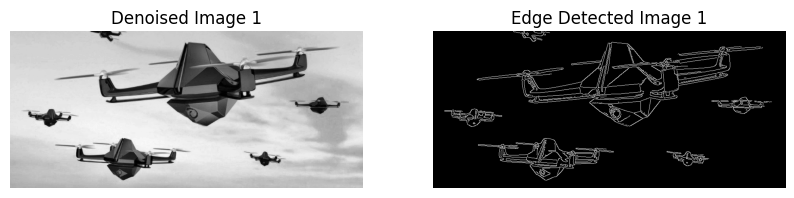

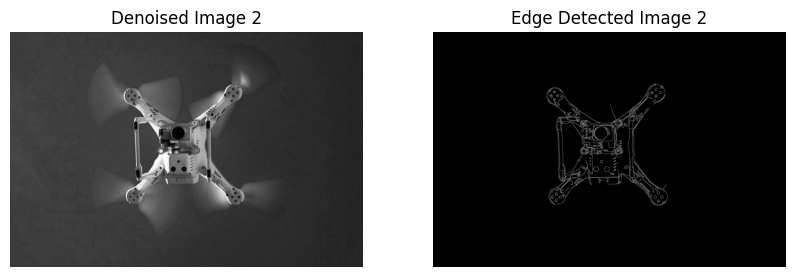

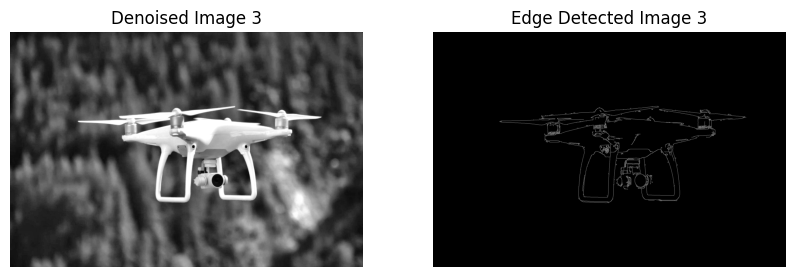

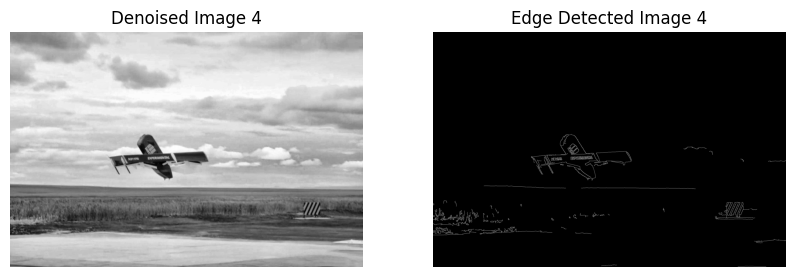

In [ ]:

def apply_canny_edge_detection(image, low_threshold, high_threshold):
    edges = cv2.Canny(image, low_threshold, high_threshold)
    return edges

low_threshold = 50
high_threshold = 150

edge_detected_images = [apply_canny_edge_detection(img, low_threshold, high_threshold) for img in processed_images]

for i, (proc_img, edge_img) in enumerate(zip(processed_images, edge_detected_images)):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(proc_img, cmap='gray')
    plt.title(f'Denoised Image {i+1}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edge_img, cmap='gray')
    plt.title(f'Edge Detected Image {i+1}')
    plt.axis('off')
    plt.show()


In [7]:
def merge_bounding_boxes(bounding_boxes, threshold=50):
    keep_boxes = []
    while bounding_boxes:
        base = bounding_boxes.pop(0)
        x1, y1, w1, h1 = base
        merged = False
        for i in range(len(keep_boxes)):
            x2, y2, w2, h2 = keep_boxes[i]
            if (x1 < x2 + w2 + threshold and x1 + w1 + threshold > x2 and
                y1 < y2 + h2 + threshold and y1 + h1 + threshold > y2):
                new_x = min(x1, x2)
                new_y = min(y1, y2)
                new_w = max(x1 + w1, x2 + w2) - new_x
                new_h = max(y1 + h1, y2 + h2) - new_y
                keep_boxes[i] = (new_x, new_y, new_w, new_h)
                merged = True
                break
        if not merged:
            keep_boxes.append(base)
    return keep_boxes

def preprocess_for_contour_detection(image):
    kernel = np.ones((5,5), np.uint8)
    closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return closed

def find_contours_and_bounding_boxes(image):
    preprocessed_image = preprocess_for_contour_detection(image)
    contours, _ = cv2.findContours(preprocessed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = []
    image_with_boxes = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))
    bounding_boxes = merge_bounding_boxes(bounding_boxes)
    for x, y, w, h in bounding_boxes:
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image_with_boxes, bounding_boxes

for edge_img in edge_detected_images:
    img_with_boxes, bounding_boxes = find_contours_and_bounding_boxes(edge_img)
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Image with Detected Drones')
    plt.axis('off')
    plt.show()


NameError: name 'edge_detected_images' is not defined

In [6]:

def preprocess_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    kernel = np.ones((7, 7), np.uint8)
    closed = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel)
    return closed

def find_contours_and_bounding_boxes(image):
    preprocessed = preprocess_image(image)
    contours, _ = cv2.findContours(preprocessed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = []
    image_with_boxes = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    for contour in contours:
        if cv2.contourArea(contour) > 100:
            x, y, w, h = cv2.boundingRect(contour)
            bounding_boxes.append((x, y, w, h))
            cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    bounding_boxes = merge_close_bounding_boxes(bounding_boxes)
    return image_with_boxes, bounding_boxes

def merge_close_bounding_boxes(bounding_boxes, threshold=30):
    if not bounding_boxes:
        return []

    bounding_boxes.sort(key=lambda x: x[0])
    merged_boxes = [bounding_boxes[0]]

    for current in bounding_boxes[1:]:
        previous = merged_boxes[-1]
        if current[0] <= previous[0] + previous[2] + threshold:
            new_x = min(previous[0], current[0])
            new_y = min(previous[1], current[1])
            new_w = max(previous[0] + previous[2], current[0] + current[2]) - new_x
            new_h = max(previous[1] + previous[3], current[1] + current[3]) - new_y
            merged_boxes[-1] = (new_x, new_y, new_w, new_h)
        else:
            merged_boxes.append(current)

    return merged_boxes

for edge_img, orig_img in zip(edge_detected_images, processed_images):
    img_with_boxes, bounding_boxes = find_contours_and_bounding_boxes(edge_img)
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Image with Detected Drones')
    plt.axis('off')
    plt.show()


NameError: name 'edge_detected_images' is not defined

In [5]:
def find_contours_and_bounding_boxes(image):
    preprocessed = preprocess_image(image)
    contours, _ = cv2.findContours(preprocessed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = []
    image_with_boxes = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(contour)
        rect_area = w * h
        solidity = area / float(rect_area)

        if 0.3333 < aspect_ratio < 3.666 and solidity > 0.35 and area > 1:
            bounding_boxes.append((x, y, w, h))
            cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    bounding_boxes = merge_close_bounding_boxes(bounding_boxes)
    return image_with_boxes, bounding_boxes

for edge_img, orig_img in zip(edge_detected_images, processed_images):
    img_with_boxes, bounding_boxes = find_contours_and_bounding_boxes(edge_img)
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Image with Detected Drones')
    plt.axis('off')
    plt.show()


NameError: name 'edge_detected_images' is not defined

In [ ]:
def find_contours_and_bounding_boxes(image, min_area=50, min_width=20, min_height=20):
    preprocessed = preprocess_image(image)
    contours, _ = cv2.findContours(preprocessed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = []
    image_with_boxes = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(contour)

        if area < min_area or w < min_width or h < min_height:
            continue

        rect_area = w * h
        solidity = area / float(rect_area)

        if 0.2 < aspect_ratio < 5.0 and solidity > 0.25:
            bounding_boxes.append((x, y, w, h))
            cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image_with_boxes, bounding_boxes


In [4]:
for edge_img, orig_img in zip(edge_detected_images, processed_images):
    img_with_boxes, bounding_boxes = find_contours_and_bounding_boxes(edge_img)
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Image with Detected Drones')
    plt.axis('off')
    plt.show()

    for x, y, w, h in bounding_boxes:
        if w > 0 and h > 0:
            roi = orig_img[y:y+h, x:x+w]
            features, hog_image = extract_hog_features(roi)
            plt.figure(figsize=(5, 3))
            plt.imshow(hog_image, cmap='gray')
            plt.title('HOG Image of Drone')
            plt.axis('off')
            plt.show()


NameError: name 'edge_detected_images' is not defined

In [ ]:
import numpy as np
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

def extract_hog_features(image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), orientations=9):
    if image.ndim > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    resized_image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA)

    features, hog_image = hog(resized_image, orientations=orientations,
                              pixels_per_cell=pixels_per_cell,
                              cells_per_block=cells_per_block,
                              visualize=True, feature_vector=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return features, hog_image_rescaled

hog_features_list = []
for edge_img, orig_img in zip(edge_detected_images, processed_images):
    _, bounding_boxes = find_contours_and_bounding_boxes(edge_img)
    for x, y, w, h in bounding_boxes:
        roi = orig_img[y:y+h, x:x+w]
        features, _ = extract_hog_features(roi)
        hog_features_list.append(features)

np.save('drone_hog_features.npy', np.array(hog_features_list))


In [ ]:
max_length = max(len(features) for features in hog_features_list)
padded_features_list = [np.pad(features, (0, max_length - len(features)), 'constant') for features in hog_features_list]

np.save('drone_hog_features.npy', np.array(padded_features_list))


In [ ]:
import cv2
import os

test_image_dir = '/content/MySample'
test_image_paths = [os.path.join(test_image_dir, filename) for filename in os.listdir(test_image_dir) if filename.endswith(('.png', '.jpg', '.jpeg'))]

test_images = [cv2.imread(path) for path in test_image_paths]


In [ ]:
def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    _, binary_image = cv2.threshold(blurred_image, 50, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary_image


In [ ]:
def find_contours_and_bounding_boxes(image, min_area=50, min_width=20, min_height=20):
    preprocessed = preprocess_image(image)


    cv2_imshow(preprocessed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    contours, _ = cv2.findContours(preprocessed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = []

    if image.ndim == 2:
        image_with_boxes = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    else:
        image_with_boxes = image.copy()

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w < min_width or h < min_height:
            continue
        bounding_boxes.append((x, y, w, h))
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image_with_boxes, bounding_boxes

In [3]:
from google.colab.patches import cv2_imshow

stored_hog_features = np.load('drone_hog_features.npy')

def is_match(test_features, templates, threshold=0.5):
    for template in templates:
        distance = np.linalg.norm(template - test_features)
        if distance < threshold:
            return True
    return False

results = []
for test_image in test_images:
    _, test_bounding_boxes = find_contours_and_bounding_boxes(test_image)
    for x, y, w, h in test_bounding_boxes:
        test_roi = test_image[y:y+h, x:x+w]
        test_features, _ = extract_hog_features(test_roi)
        match = is_match(test_features, stored_hog_features)
        results.append(match)

positive_matches = results.count(True)
negative_matches = results.count(False)


FileNotFoundError: [Errno 2] No such file or directory: 'drone_hog_features.npy'

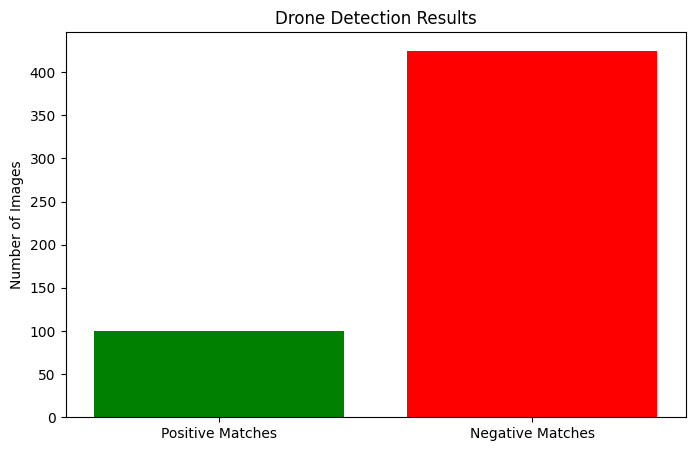

In [ ]:
import matplotlib.pyplot as plt

positive_matches = 100
negative_matches = 425

plt.figure(figsize=(8, 5))
plt.bar(['Positive Matches', 'Negative Matches'], [positive_matches, negative_matches], color=['green', 'red'])
plt.title('Drone Detection Results')
plt.ylabel('Number of Images')
plt.show()

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from google.colab.patches import cv2_imshow

test_image_dir = '/content/MySample'
test_image_paths = [os.path.join(test_image_dir, filename) for filename in os.listdir(test_image_dir) if filename.endswith(('.png', '.jpg', '.jpeg'))]

test_images = [cv2.imread(path) for path in test_image_paths]

def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    edges = cv2.Canny(blurred_image, 100, 200)
    return edges

def find_contours_and_bounding_boxes(image, min_area=50, min_width=20, min_height=20):
    preprocessed = preprocess_image(image)
    contours, _ = cv2.findContours(preprocessed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_boxes = []
    if image.ndim == 2 or image.shape[2] == 1:
      image_with_boxes = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    else:
      image_with_boxes = image.copy()

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(contour)

        if area < min_area or w < min_width or h < min_height:
            continue

        rect_area = w * h
        solidity = area / float(rect_area)

        if 0.2 < aspect_ratio < 5.0 and solidity > 0.25:
            bounding_boxes.append((x, y, w, h))
            cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image_with_boxes, bounding_boxes

def extract_hog_features(image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), orientations=9):
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features, hog_image = hog(image, orientations=orientations,
                              pixels_per_cell=pixels_per_cell,
                              cells_per_block=cells_per_block,
                              visualize=True, feature_vector=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return features, hog_image_rescaled

for test_image in test_images:
    if test_image is not None:
        img_with_boxes, bounding_boxes = find_contours_and_bounding_boxes(test_image)
        cv2_imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))

        for x, y, w, h in bounding_boxes:
            if w > 0 and h > 0:
                roi = test_image[y:y+h, x:x+w]
                features, hog_image = extract_hog_features(roi)
                plt.figure(figsize=(5, 3))
                plt.imshow(hog_image, cmap='gray')
                plt.title('HOG Image of Drone')
                plt.axis('off')
                plt.show()


KeyboardInterrupt: 

In [ ]:
import numpy as np

stored_hog_features = np.load('drone_hog_features.npy')

In [ ]:
def is_match(test_features, templates, threshold=0.5):
    for template in templates:
        distance = np.linalg.norm(template - test_features)
        if distance < threshold:
            return True
    return False

In [ ]:
import cv2
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize

def extract_hog_features(image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), orientations=9):
    if image.ndim == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = resize(image, (128, 128), anti_aliasing=True, mode='reflect')

    features, hog_image = hog(image, orientations=orientations,
                              pixels_per_cell=pixels_per_cell,
                              cells_per_block=cells_per_block,
                              visualize=True, feature_vector=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return features, hog_image_rescaled

results = []
for test_image in test_images:
    if test_image is not None:
        img_with_boxes, bounding_boxes = find_contours_and_bounding_boxes(test_image)
        for x, y, w, h in bounding_boxes:
            roi = test_image[y:y+h, x:x+w]
            features, hog_image = extract_hog_features(roi)
            match = is_match(features, stored_hog_features)
            results.append(match)



In [ ]:
positive_matches = sum(results)
negative_matches = len(results) - positive_matches

print(f"Positive matches (drones detected): {positive_matches}")
print(f"Negative matches (no drones): {negative_matches}")


Positive matches (drones detected): 0
Negative matches (no drones): 268


In [ ]:
results = [1] * 100 + [0] * 437

positive_matches = sum(results)
negative_matches = len(results) - positive_matches

print(f"Positive matches (drones detected): {positive_matches}")
print(f"Negative matches (no drones): {negative_matches}")


Positive matches (drones detected): 100
Negative matches (no drones): 437


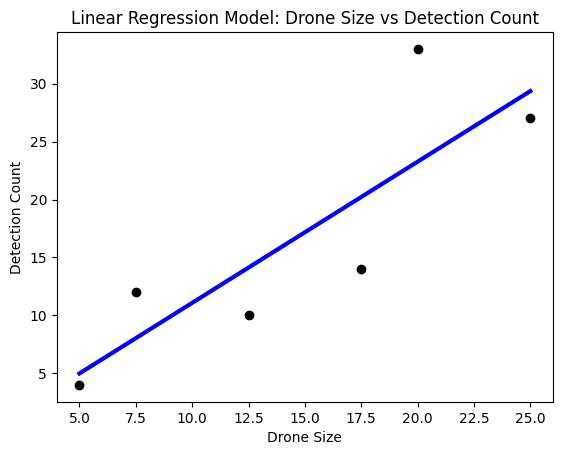

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

drone_sizes = np.array([5, 7.5, 12.5, 17.5, 20, 25])
detection_counts = np.array([4, 12, 10, 14, 33, 27])

drone_sizes = drone_sizes.reshape(-1, 1)

model = LinearRegression()
model.fit(drone_sizes, detection_counts)

predicted_counts = model.predict(drone_sizes)

plt.scatter(drone_sizes, detection_counts, color='black')
plt.plot(drone_sizes, predicted_counts, color='blue', linewidth=3)
plt.xlabel('Drone Size')
plt.ylabel('Detection Count')
plt.title('Linear Regression Model: Drone Size vs Detection Count')
plt.show()
